In [28]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    # Fill in code
    for index in range(len(X)):
        y_hat = prediction(X[index], W, b)
        if (y[index]-y_hat==1):
            W[0] = W[0] + (learn_rate * X[index][0])
            W[1] = W[1] + (learn_rate * X[index][1])
            b = b + (learn_rate * 1)
        elif (y[index]-y_hat==-1):
            W[0] = W[0] - (learn_rate * X[index][0])
            W[1] = W[1] - (learn_rate * X[index][1])
            b = b - (learn_rate * 1)
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines


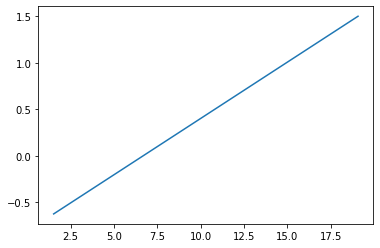

In [35]:
import matplotlib.pyplot as plt
data = np.loadtxt('ud-L01-03-perceptrons_alg.txt', delimiter=',')
#data[:, [0,1]]
dtrain = trainPerceptronAlgorithm(data[:, [0,1]], data.T[2])
plt.plot(dtrain[0],dtrain[1])
plt.show()